In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40
)

In [0]:
image_path = '/content/drive/My Drive/cat/cat/cat.jpg'

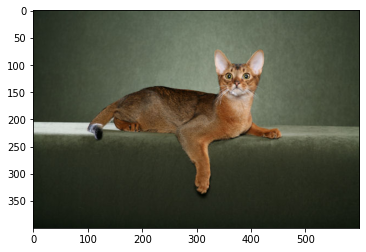

In [27]:
plt.imshow(plt.imread(image_path))

Found 1 images belonging to 1 classes.


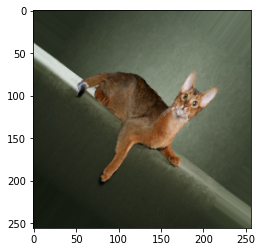

In [28]:
x, y = next(generator.flow_from_directory('/content/drive/My Drive/cat', batch_size=1))
plt.imshow(x[0].astype('uint8'))

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = [-100,  -50, 0, 50, 100],
    height_shift_range = [-50,0,50])

Found 1 images belonging to 1 classes.


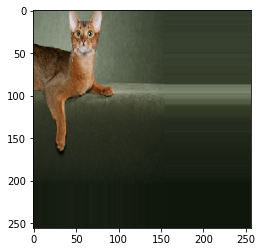

In [32]:
x, y = next(generator.flow_from_directory('/content/drive/My Drive/cat', batch_size=1))
plt.imshow(x[0].astype('uint8'))

Found 1 images belonging to 1 classes.


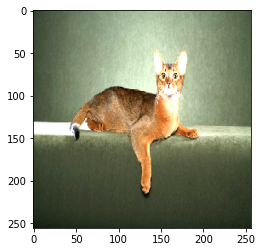

In [33]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range = (0.5,2)
)
x, y = next(generator.flow_from_directory('/content/drive/My Drive/cat', batch_size=1))
plt.imshow(x[0].astype('uint8'))

Found 1 images belonging to 1 classes.


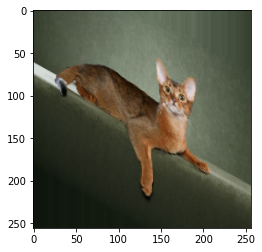

In [34]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range = 40
)
x,y = next(generator.flow_from_directory('/content/drive/My Drive/cat', batch_size=1))
plt.imshow(x[0].astype('uint8'))

Found 1 images belonging to 1 classes.


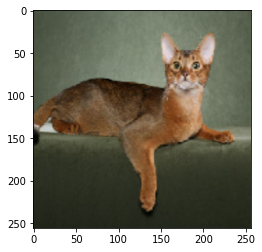

In [36]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range = 0.5
)
x,y = next(generator.flow_from_directory('/content/drive/My Drive/cat', batch_size=1))
plt.imshow(x[0].astype('uint8'))

Found 1 images belonging to 1 classes.


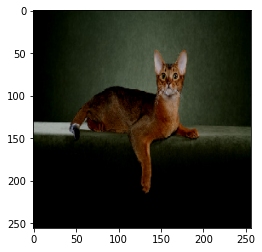

In [38]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range = 100
)
x,y = next(generator.flow_from_directory('/content/drive/My Drive/cat', batch_size=1))
plt.imshow(x[0].astype('uint8'))

In [40]:
x.mean()

24.460976

In [41]:
np.array(Image.open(image_path)).mean()

69.57810416666666

Found 1 images belonging to 1 classes.


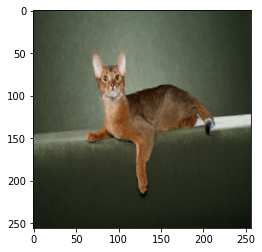

In [44]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = False,
    rotation_range = 40
)
x,y = next(generator.flow_from_directory('/content/drive/My Drive/cat', batch_size=1))
plt.imshow(x[0].astype('uint8'))

# Data Normalization

In [0]:
(x_train,y_train) , (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True 
)
generator.fit(x_train)

In [54]:
x,y = next(generator.flow(x_train, y_train, batch_size= 1))
print(x.mean(),x.std(),y)
print(x_train.mean())

0.47196427 0.70256335 [[5]]
120.70756512369792


In [0]:
(x_train,y_train) , (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True 
)
generator.fit(x_train)

In [50]:
x,y = next(generator.flow(x_train, y_train, batch_size= 1))
print(x.mean(),x.std(),y)
print(x_train.mean())

-1.1920929e-07 0.99999994 [[6]]
120.70756512369792


In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1.,
      preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [56]:
x,y = next(generator.flow(x_train, y_train, batch_size= 1))
print(x.mean(),x.std(),y)

-0.26476204 0.48120615 [[3]]


In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1.,
      preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
      horizontal_flip = True,
      rotation_range = 20
)

In [58]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top=False,pooling='avg',input_shape=(32,32,3)
    ),   
    tf.keras.layers.Dense(10,activation='softmax')  
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

9412608/9406464 [==============================] - 0s 0us/step


In [63]:
_ = model.fit(
    generator.flow(x_train,y_train,batch_size=64),
    epochs=5,steps_per_epoch=50
)

Epoch 1/5
50/50 [==============================] - 22s 438ms/step - loss: 1.6904 - accuracy: 0.0919
Epoch 2/5
50/50 [==============================] - 22s 439ms/step - loss: 1.5020 - accuracy: 0.0956
Epoch 3/5
50/50 [==============================] - 24s 479ms/step - loss: 1.4888 - accuracy: 0.0913
Epoch 4/5
50/50 [==============================] - 22s 439ms/step - loss: 1.4696 - accuracy: 0.0972
Epoch 5/5
50/50 [==============================] - 22s 432ms/step - loss: 1.4002 - accuracy: 0.0977
